In [321]:
import os
print(os.listdir('C:\\Users\\Federico Nada\\Desktop\\DataFest/Notebooks'))

['.ipynb_checkpoints', 'Exploratory Analysis.ipynb', 'Standardize Values.ipynb', 'train.csv', 'train2.csv', 'Untitled.ipynb', 'Workout Strategies.ipynb']


In [322]:
import pandas as pd
import matplotlib.pyplot as plt

ratios = pd.read_csv('C:\\Users\\Federico Nada\\Desktop\\DataFest/Data for DataFest 2019/rpe.csv')

In [323]:
ratios['Date'] =  pd.to_datetime(ratios['Date'])
ratios.set_index('Date', inplace=True)
ratios.sort_values('Date', inplace = True)

In [324]:
import datetime as datetime
enddates = []
enddates.append('11/29/2017')
enddates.append('01/25/2018')
enddates.append('04/12/2018')
enddates.append('05/11/2018')
enddates.append('06/08/2018')
enddates.append('07/20/2018')
enddates = [datetime.datetime.strptime(x, '%m/%d/%Y') for x in enddates]

In [325]:
startdates = []
startdates.append('10/15/2017')
startdates.append('12/02/2017')
startdates.append('01/29/2018')
startdates.append('04/23/2018')
startdates.append('05/14/2018')
startdates.append('06/11/2018')
startdates = [datetime.datetime.strptime(x, '%m/%d/%Y') for x in startdates]

In [326]:
dubai =  ratios.loc[(ratios.index > startdates[0]) & (ratios.index < enddates[0])][['PlayerID' ,'AcuteChronicRatio']]
sydney =  ratios.loc[(ratios.index > startdates[1]) & (ratios.index < enddates[1])][['PlayerID' ,'AcuteChronicRatio']]
commonwealth =  ratios.loc[(ratios.index > startdates[2]) & (ratios.index < enddates[2])][['PlayerID' ,'AcuteChronicRatio']]
langford =  ratios.loc[(ratios.index > startdates[3]) & (ratios.index < enddates[3])][['PlayerID' ,'AcuteChronicRatio']]
paris =  ratios.loc[(ratios.index > startdates[4]) & (ratios.index < enddates[4])][['PlayerID' ,'AcuteChronicRatio']]
world =  ratios.loc[(ratios.index > startdates[5]) & (ratios.index < enddates[5])][['PlayerID' ,'AcuteChronicRatio']]

In [327]:
dubai_d = {}
for x in range(1, 18):
    dubai_d["dubai{0}".format(x)]= dubai[dubai['PlayerID'] == x].groupby(dubai[dubai['PlayerID'] == x].index).first()['AcuteChronicRatio'].values
sydney_d = {}
for x in range(1, 18):
    sydney_d["sydney{0}".format(x)]= sydney[sydney['PlayerID'] == x].groupby(sydney[sydney['PlayerID'] == x].index).first()['AcuteChronicRatio'].values
commonwealth_d = {}
for x in range(1, 18):
    commonwealth_d["commonwealth{0}".format(x)]= commonwealth[commonwealth['PlayerID'] == x].groupby(commonwealth[commonwealth['PlayerID'] == x].index).first()['AcuteChronicRatio'].values
langford_d = {}
for x in range(1, 18):
    langford_d["langford{0}".format(x)]= langford[langford['PlayerID'] == x].groupby(langford[langford['PlayerID'] == x].index).first()['AcuteChronicRatio'].values
paris_d = {}
for x in range(1, 18):
    paris_d["paris{0}".format(x)]= paris[paris['PlayerID'] == x].groupby(paris[paris['PlayerID'] == x].index).first()['AcuteChronicRatio'].values
world_d = {}
for x in range(1, 18):
    world_d["world{0}".format(x)]= world[world['PlayerID'] == x].groupby(world[world['PlayerID'] == x].index).first()['AcuteChronicRatio'].values

In [328]:
data = {**dubai_d, **sydney_d, **commonwealth_d, **langford_d, **paris_d, **world_d}
data

{'dubai1': array([0.68, 0.62, 0.42, 0.07, 0.07,  nan, 0.01, 0.01, 0.01, 0.05, 0.05,
        0.05, 0.04, 0.12, 0.23, 0.21, 0.87, 1.19, 1.19, 2.  , 2.24, 1.82,
        2.02, 2.2 , 2.2 , 1.32, 1.21, 1.38, 0.9 , 0.92, 1.08, 1.08, 0.81,
        0.96, 1.17, 0.85, 1.  , 1.2 , 1.2 , 0.97, 1.17]),
 'dubai2': array([0.55, 0.42, 0.44, 0.49, 0.54, 0.67, 0.43, 0.44, 0.51, 0.56, 0.81,
        0.7 , 0.57, 0.64, 1.01, 0.44, 0.44, 1.02, 0.7 , 1.34, 1.88, 1.88,
        1.42, 1.68, 1.83, 1.66, 1.18, 1.48, 1.51, 1.18, 1.06, 1.15, 0.92,
        0.55, 0.66, 0.49, 0.43, 0.34]),
 'dubai3': array([0.92, 1.09, 1.02, 1.27, 1.13, 1.17, 0.94, 0.71, 0.79, 0.58, 0.66,
        0.66, 0.67, 0.59, 0.57, 0.68, 0.57, 0.8 , 0.91, 0.91, 0.77, 1.25,
        1.56, 1.59, 1.85, 2.4 , 2.4 , 1.92, 1.96, 1.68, 1.1 , 1.42, 1.42,
        1.09, 1.04, 1.06, 0.89, 0.47, 0.47, 0.53, 0.46, 0.49, 0.41]),
 'dubai4': array([0.55, 0.41, 0.48, 0.74, 1.11, 1.18, 1.02, 0.87, 0.53, 0.49, 0.59,
        0.98, 1.25, 1.2 , 1.15, 1.48, 1.11, 1.24, 1.

In [329]:
data_array = []
bins = 10

for i in range(1,18):
    data_array.append(pd.Series(data['dubai{}'.format(i)]).groupby(pd.cut(pd.Series(data['dubai{}'.format(i)]).index, bins)).max().interpolate().values)
for i in range(1,18):
    data_array.append(pd.Series(data['sydney{}'.format(i)]).groupby(pd.cut(pd.Series(data['sydney{}'.format(i)]).index, bins)).max().interpolate().values)
for i in range(1,18):
    data_array.append(pd.Series(data['commonwealth{}'.format(i)]).groupby(pd.cut(pd.Series(data['commonwealth{}'.format(i)]).index, bins)).max().interpolate().values)
#for i in (1,2,3,4,5,6,7,8,10,11,12,13,14,15,16,17):
#    data_array.append(pd.Series(data['langford{}'.format(i)]).groupby(pd.cut(pd.Series(data['langford{}'.format(i)]).index, bins)).max().interpolate().values)
#for i in (1,2,3,4,5,6,7,8,10,11,12,13,14,15,16,17):
#    data_array.append(pd.Series(data['paris{}'.format(i)]).groupby(pd.cut(pd.Series(data['paris{}'.format(i)]).index, bins)).max().interpolate().values)
for i in (1,2,3,4,5,6,7,8,10,11,13,14,15,16,17):
    data_array.append(pd.Series(data['world{}'.format(i)]).groupby(pd.cut(pd.Series(data['world{}'.format(i)]).index, bins)).max().interpolate().values)

In [330]:
ml2 = pd.DataFrame(data_array)

In [ ]:
#SCALER
'''max = ml2.max(axis=1)
min = ml2.min(axis=1)
diff = max-min
for row in range(len(ml2)):
    for column in range(len(ml2.iloc[0])):
        ml2.iloc[row,column] = (ml2.iloc[row,column]-min[row]) / diff[row]'''

In [340]:
ml2.to_csv('train_final_reduced.csv')
ml2

,0,1,2,3,4,5,6,7,8,9
0,0.68,0.01,0.05,0.87,2.24,2.20,1.38,1.08,1.17,1.20
1,0.55,0.67,0.81,1.01,1.02,1.88,1.83,1.51,1.15,0.66
2,1.27,1.17,0.67,0.68,1.25,2.40,2.40,1.42,1.06,0.53
3,0.55,1.18,1.02,0.59,1.25,1.48,1.24,1.20,0.93,0.48
4,1.09,1.60,1.91,0.94,2.09,2.09,1.92,2.15,1.68,0.80
5,0.84,1.13,0.48,0.97,1.54,1.55,1.40,1.57,1.21,0.52
6,0.73,1.08,1.04,0.70,1.12,1.59,1.33,1.36,1.09,0.62
7,0.54,1.20,1.12,0.68,0.81,1.30,1.53,1.24,1.40,0.42
8,0.77,1.04,0.71,0.78,1.17,1.45,1.63,1.50,1.28,0.48
9,0.75,0.94,0.92,1.03,1.46,2.13,2.11,1.55,1.13,0.90


In [332]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
for i in range(2,7):
    kmeans = KMeans(n_clusters=i, random_state=10)
    cluster_labels = kmeans.fit_predict(ml2.dropna().values)

    silhouette_avg = silhouette_score(ml2.dropna().values,cluster_labels)
    print("For n_clusters =", i, "The average silhouette_score is :", silhouette_avg)

centers = kmeans.cluster_centers_

For n_clusters = 2 The average silhouette_score is : 0.22278296799873315
For n_clusters = 3 The average silhouette_score is : 0.2093302772376143
For n_clusters = 4 The average silhouette_score is : 0.2174019804869671
For n_clusters = 5 The average silhouette_score is : 0.22635905702503478
For n_clusters = 6 The average silhouette_score is : 0.19302337693630747


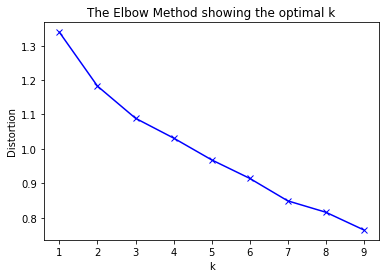

In [333]:
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np

distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(ml2.dropna().values)
    kmeanModel.fit(ml2.dropna().values)
    distortions.append(sum(np.min(cdist(ml2.dropna().values, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / ml2.dropna().values.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

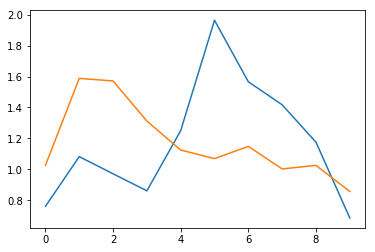

In [334]:
kmeans = KMeans(n_clusters=2)
kmeans.fit_predict(ml2.dropna().values)
centers = kmeans.cluster_centers_

for i in range(2):
    plt.plot(centers[i])

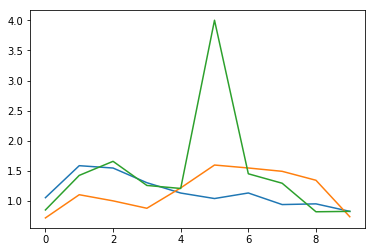

In [335]:
kmeans3 = KMeans(n_clusters=3)
kmeans3.fit_predict(ml2.dropna().values)
centers3 = kmeans3.cluster_centers_
for i in range(3):
    plt.plot(centers3[i])

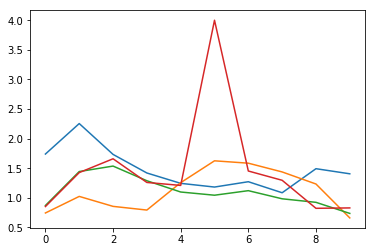

In [336]:
kmeans4 = KMeans(n_clusters=4)
kmeans4.fit_predict(ml2.dropna().values)
centers4 = kmeans4.cluster_centers_
for i in range(4):
    plt.plot(centers4[i])

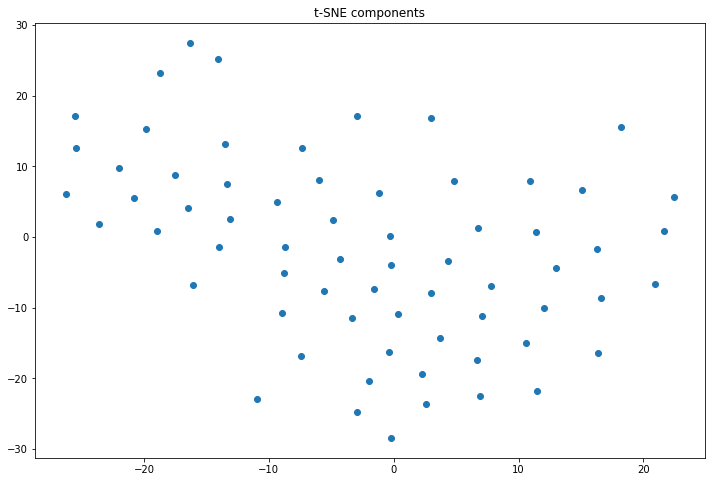

In [337]:
from sklearn.manifold import TSNE

X = TSNE(n_components = 2).fit_transform(ml2.dropna().values)

plt.figure(figsize=(12,8))
plt.title('t-SNE components')
plt.scatter(X[:,0], X[:,1])

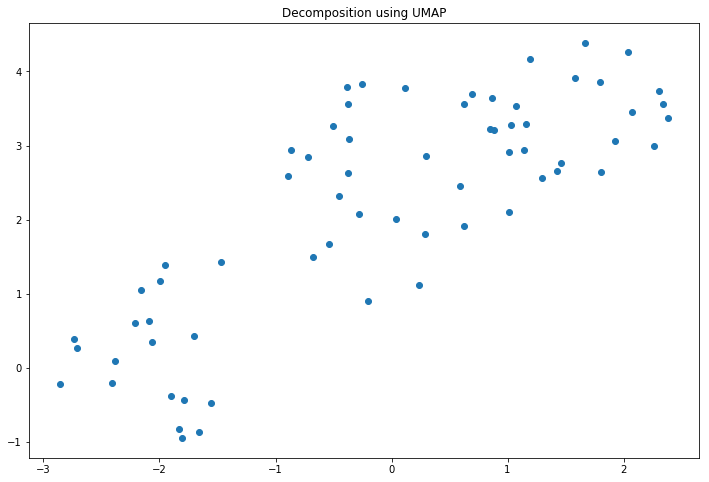

In [338]:
import umap

umap_data = umap.UMAP(n_neighbors=5, min_dist=0.3, n_components=3, random_state=5).fit_transform(ml2.dropna().values)
plt.figure(figsize=(12,8))
plt.title('Decomposition using UMAP')
plt.scatter(umap_data[:,0], umap_data[:,1])

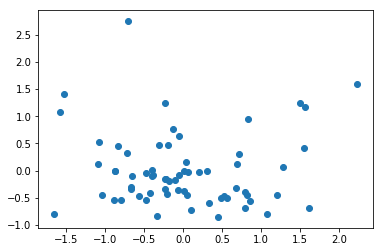

In [339]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

principalComponents = pca.fit_transform(ml2.dropna().values)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])
plt.scatter(principalDf['principal component 1'], principalDf['principal component 2'])